In [1]:
from IPython.display import Image
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# inline plotting instead of popping out
%matplotlib inline

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from lib import *

In [2]:
import pandas as pd
df=pd.read_csv('default of credit card clients.csv')

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df= df.drop('Unnamed: 0', 1)[1:]

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
X = df.drop('Y', 1)
y = df['Y']

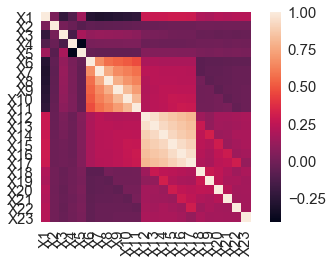

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df.shape[0]

sns.set(font_scale=1.5)

ticklabels = [s for s in X.columns]

hm = sns.heatmap(R,
            cbar=True,
            square=True,
            yticklabels=ticklabels,
            xticklabels=ticklabels)

plt.tight_layout()
plt.show()

In [9]:
eigen_vals, eigen_vecs = np.linalg.eigh(R)

print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[0.02321923 0.02529523 0.0407846  0.07015569 0.13178629 0.188691
 0.24912848 0.25988698 0.40364053 0.5243899  0.5709486  0.68282117
 0.7327882  0.78292966 0.87124937 0.88761632 0.90758794 0.95719956
 1.02523796 1.47226542 1.55096063 4.09832791 6.54308934]


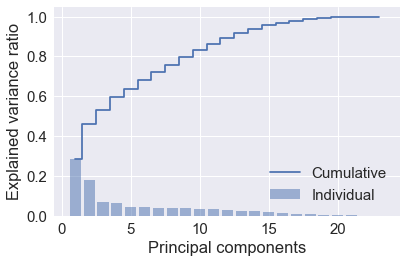

In [10]:
import matplotlib.pyplot as plt

tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

In [12]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Projection matrix W:\n', W)

Projection matrix W:
 [[-0.06851843  0.31632288]
 [ 0.02165646  0.03059473]
 [-0.01920561 -0.09152254]
 [ 0.00560026 -0.04325094]
 [-0.01423152  0.06657803]
 [-0.16108197 -0.29812388]
 [-0.19411964 -0.33482061]
 [-0.20021304 -0.34389407]
 [-0.20703823 -0.34458144]
 [-0.21096047 -0.33160038]
 [-0.20641235 -0.30579387]
 [-0.33438512  0.13981517]
 [-0.345797    0.14022699]
 [-0.34977712  0.14621339]
 [-0.35388322  0.14544983]
 [-0.35175241  0.14376087]
 [-0.34451439  0.14187216]
 [-0.09423123  0.14910947]
 [-0.07868088  0.1398719 ]
 [-0.08639419  0.1515701 ]
 [-0.07779272  0.14140907]
 [-0.07535443  0.1371905 ]
 [-0.06994816  0.12939638]]


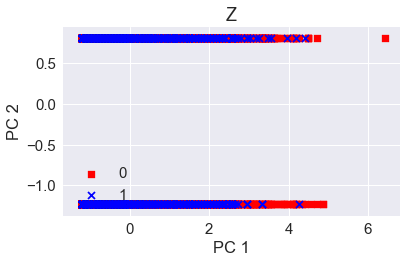

In [13]:
Z_pca = Z.dot(W)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z[y.values==l, 0], 
                Z[y.values==l, 1], 
                c=c, label=l, marker=m)

#for l, c, m in zip(np.unique(y.values), colors, markers):
 #   plt.scatter(Z_pca[y.values==l, 0], 
  #              Z_pca[y.values==l, 1], 
   #             c=c, label=l, marker=m)

plt.title('Z')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

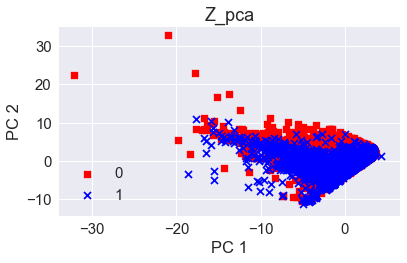

In [14]:
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_pca[y.values==l, 0], 
                Z_pca[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [15]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis]))
print('Projection matrix W:\n', W)

Z_pca = Z.dot(W)

Projection matrix W:
 [[-0.06851843  0.31632288 -0.01745352  0.06998363 -0.14954003]
 [ 0.02165646  0.03059473 -0.02403751 -0.0782305   0.88407313]
 [-0.01920561 -0.09152254  0.3164258   0.24658459  0.36489919]
 [ 0.00560026 -0.04325094 -0.45318475 -0.44456143 -0.05333416]
 [-0.01423152  0.06657803  0.46234666  0.46275277 -0.16391183]
 [-0.16108197 -0.29812388  0.01750759  0.01595915 -0.03452505]
 [-0.19411964 -0.33482061 -0.01777371  0.04986817 -0.03704992]
 [-0.20021304 -0.34389407 -0.06173052  0.0842726  -0.02365171]
 [-0.20703823 -0.34458144 -0.08892977  0.10936684 -0.00780868]
 [-0.21096047 -0.33160038 -0.10870764  0.11557615  0.0016936 ]
 [-0.20641235 -0.30579387 -0.11086652  0.10989005  0.01228756]
 [-0.33438512  0.13981517  0.15087731 -0.16795275 -0.01316661]
 [-0.345797    0.14022699  0.12705654 -0.14929984  0.00457378]
 [-0.34977712  0.14621339  0.08391571 -0.10478871  0.02985998]
 [-0.35388322  0.14544983  0.07050889 -0.10060975  0.02257188]
 [-0.35175241  0.14376087  0.0565

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    Z_pca, y, test_size=0.2, random_state=22)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=500, 
                                random_state=22,
                                n_jobs=2)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

 1) X2                             0.282592
 2) X1                             0.195285
 3) X3                             0.175318
 4) X4                             0.174296
 5) X5                             0.172509


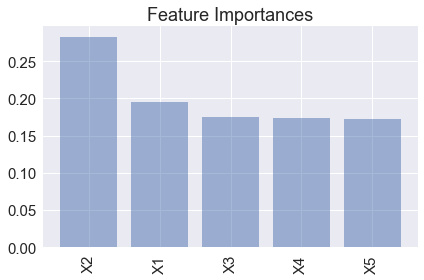

In [18]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()

plt.show()

In [19]:
from sklearn.svm import SVC

# kernel: the kernel function, can be 'linear', 'poly', 'rbf', ...etc
# C is the hyperparameter for the error penalty term
svm_linear = SVC(kernel='linear', C=5.0, random_state=0)

svm_linear.fit(X_train_std, y_train)
y_pred = svm_linear.predict(X_test_std)
print('[Linear SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# C is the hyperparameter for the error penalty term
# gamma is the hyperparameter for the rbf kernel
svm_rbf = SVC(kernel='rbf', random_state=0, gamma=0.2, C=5.0)

svm_rbf.fit(X_train_std, y_train)
y_pred = svm_rbf.predict(X_test_std)
print('[Nonlinear SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


[Linear SVC]
Misclassified samples: 1274
Accuracy: 0.79
[Nonlinear SVC]
Misclassified samples: 1139
Accuracy: 0.81


In [20]:
print('[Nonlinear SVC: C=0.1, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=0.1)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=1.0, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=100, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=100.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


[Nonlinear SVC: C=0.1, gamma=0.01]
Misclassified samples: 1260
Accuracy: 0.79

[Nonlinear SVC: C=1.0, gamma=0.01]
Misclassified samples: 1137
Accuracy: 0.81

[Nonlinear SVC: C=10, gamma=0.01]
Misclassified samples: 1137
Accuracy: 0.81

[Nonlinear SVC: C=100, gamma=0.01]
Misclassified samples: 1137
Accuracy: 0.81


In [21]:
print('[Nonlinear SVC: C=10, gamma=0.00001]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.00001, C=0.1)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.0001]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.0001, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.001]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.001, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=0.1]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=10, gamma=1.0]')
svm = SVC(kernel='rbf', random_state=0, gamma=1.0, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[Nonlinear SVC: C=10, gamma=0.00001]
Misclassified samples: 1274
Accuracy: 0.79

[Nonlinear SVC: C=10, gamma=0.0001]
Misclassified samples: 1274
Accuracy: 0.79

[Nonlinear SVC: C=10, gamma=0.001]
Misclassified samples: 1260
Accuracy: 0.79

[Nonlinear SVC: C=10, gamma=0.01]
Misclassified samples: 1137
Accuracy: 0.81

[Nonlinear SVC: C=10, gamma=0.1]
Misclassified samples: 1150
Accuracy: 0.81

[Nonlinear SVC: C=10, gamma=1.0]
Misclassified samples: 1168
Accuracy: 0.81


In [22]:
from sklearn.model_selection import GridSearchCV

param_C = [0.1, 1.0, 10.0, 100]
param_gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]

svm = SVC(random_state=22)

# set the param_grid parameter of GridSearchCV to a list of dictionaries
param_grid = [{'C': param_C, 
               'gamma': param_gamma, 
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8035
{'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [23]:
clf = gs.best_estimator_
clf.fit(X_train_std, y_train)
print('\n[Nonlinear SVC: grid search]')
print('Test accuracy: %.2f' % clf.score(X_test_std, y_test))


[Nonlinear SVC: grid search]
Test accuracy: 0.81


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#grid.fit(X_train,y_train)
grid_predictions = clf.predict(X_train_std)
print(confusion_matrix(y_train,grid_predictions))
print(classification_report(y_train,grid_predictions))

[[17893   745]
 [ 3750  1612]]
             precision    recall  f1-score   support

          0       0.83      0.96      0.89     18638
          1       0.68      0.30      0.42      5362

avg / total       0.79      0.81      0.78     24000

